In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, binom
from scipy.stats import poisson
import seaborn as sns
import env
np.random.seed(123)


In [74]:
import scipy

In [75]:
alpha = 0.05

AttributeError: 'Line2D' object has no property 'lable'

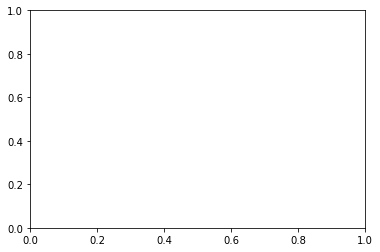

In [76]:
x = np.arange(50, 150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, lable = "office 1")
plt.plot(x, y2, lable = "office 2")

plt.legend()

In [ ]:
# sample 1
mean1 = 45
sdev1 = 1.9
ssize1 = 1115

#sample 2
mean2 = 49
sdev2 = 1.9
ssize2 = 1005

In [ ]:
t, p = scipy.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True )

In [ ]:
t, p 

In [ ]:
# sample 1
mean1n = 90
sdev1n = 15
ssize1n = 40

#sample 2
mean2n = 100
sdev2n = 20
ssize2n = 50

In [ ]:
t, p = scipy.stats.ttest_ind_from_stats(mean1n, sdev1n, ssize1n, mean2n, sdev2n, ssize2n, equal_var=False )



In [ ]:
t

In [ ]:
p

In [ ]:
from pydataset import data
mpg = data('mpg')

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

mpg.year.unique()


In [ ]:
mpg.year.hist()


In [ ]:
mpg

In [ ]:
mpg = mpg.rename(columns={'cty': 'city'})

mpg = mpg.rename(columns={'hwy': 'highway'})

mpg = mpg.rename(columns={'cyl': 'cylinder'})

In [ ]:
mpg

In [ ]:
mpg['mileage_difference'] = mpg.city - mpg.highway

mpg

In [ ]:
mpg.sort_values('mileage_difference')

In [ ]:
mpg['average_mileage'] = (mpg['highway'] + mpg['city'])/2

In [ ]:
mpg = mpg[~mpg['mileage_difference'].isna()]


In [ ]:
mpg

In [ ]:
mpg.average_mileage.mean()

In [ ]:
mpg.info()

In [ ]:
mpg.value_counts('year')

In [ ]:
fuel_2008 = mpg[mpg.year == 2008].average_mileage

In [ ]:
fuel_1999 = mpg[mpg.year == 1999].average_mileage

In [ ]:
fuel_2008.var()

In [ ]:
fuel_2008.hist()

In [ ]:
fuel_1999.var(), fuel_2008.var()

In [ ]:
fuel_1999.hist()

In [ ]:
stat, pval = stats.levene(fuel_2008, fuel_1999)

In [ ]:
if pval < 0.05:
    print('we can reject the H0 that the two samples have equal variance')
else:
    print('failed to reject null')

In [ ]:
pval

In [ ]:
alpha = 0.05

In [ ]:
t, p = stats.ttest_ind(fuel_2008, fuel_1999, equal_var=True)

t, p, alpha



In [ ]:
fuel_2008.mean(), fuel_1999.mean()

In [ ]:
plt.hist[fuel_2008, fuel_1999], lable[]

In [ ]:
# Are compact cars more fuel-efficient than the average car?

mpg.value_counts('class')

In [ ]:
# Are compact cars more fuel-efficient than the average car?

mpg.groupby('class').average_mileage.mean().sort_values(ascending = False)




In [ ]:

mpg.groupby('class').average_mileage.mean().sort_values(ascending = False).hist()

In [ ]:
fe_compact = mpg[mpg['class'] == 'compact'].average_mileage

pop_mean = mpg.average_mileage.mean()

In [ ]:
fe_compact.hist()

In [ ]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)

t, p, alpha

In [ ]:
if (p/2 < alpha) and t > 0:
   print('reject')

In [ ]:
# Do manual cars get better gas mileage than automatic cars?

mpg.trans.value_counts()

In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].average_mileage
fe_manual = mpg[mpg.trans.str.contains('manual')].average_mileage

In [ ]:
stats.levene(fe_auto,fe_manual )

In [ ]:
fe_auto.var(), fe_manual.var()

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = True)

t, p/2, alpha

In [ ]:
fe_auto.mean(), fe_manual.mean()

## Exercises

- Continue working in your hypothesis_testing notebook.


In [ ]:
#1) Use the telco_churn data. 
# -Does tenure correlate with monthly charges? 
# -Total charges? 
# -What happens if you control for phone and internet service?

In [77]:
from env import get_db_url
import pandas as pd
import numpy as np


In [78]:
url = get_db_url("telco_churn")
sql = """
SELECT * FROM customers
"""

df = pd.read_sql(sql, url)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [79]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [80]:
tenure = df.tenure
monthly_charges = df.monthly_charges

r, p = stats.pearsonr(tenure, monthly_charges)

r, p 

(0.24789985628615263, 4.0940449914811555e-99)

In [81]:
α = .05

In [82]:
# Does tenure correlate with monthly charges?
p < α

True

In [102]:
from env import host, user, password
database = "telco_churn"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "telco_churn"
query = """ 
            SELECT total_charges, tenure 
            FROM customers as c
            WHERE c.phone_service = 'yes' and c.total_charges > 0
            
        """


In [103]:
tenure = df.tenure

total_charges = df.total_charges


p = stats.pearsonr(total_charges, tenure)

p

AttributeError: 'DataFrame' object has no attribute 'total_charges'

In [ ]:
stats.pearsonr(df.tenure, df.total_charges)


In [24]:
# -What happens if you control for phone and internet service?



In [86]:
from env import host, user, password
database = "telco_churn"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "telco_churn"
query = """ 
            SELECT total_charges, tenure 
            FROM customers as c
            WHERE c.phone_service = 'yes' and c.total_charges > 0
            
        """

dfphone = pd.read_sql(query, url)

dfphone = dfphone.astype(float)


stats.pearsonr(dfphone.total_charges, dfphone.tenure)


(0.8298393210699475, 0.0)

In [87]:
from env import host, user, password
database = "telco_churn"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "telco_churn"
query = """ 
            SELECT total_charges, tenure 
            FROM customers as c
            WHERE c.internet_service_type_id < 3 and c.total_charges > 0
            
        """

dfinternet = pd.read_sql(query, url)

dfinternet = dfinternet.astype(float)


stats.pearsonr(dfinternet.total_charges, dfinternet.tenure)


(0.9319346187418136, 0.0)

In [88]:
# 2) Use the employees database.


In [89]:

from env import host, user, password
database = "employees"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "employees"
query = """ 
            SELECT
    e.*,
    datediff('2002-09-30', e.hire_date) tenure,
    t.title,
    t.from_date title_from,
    datediff('2002-09-30', t.from_date) t_tenure,
    et.titles,
    s.salary,
    s.from_date salary_from,
    datediff('2002-09-30', s.from_date) s_tenure,
    es.salaries
FROM
    employees e
JOIN 
    titles t 
    USING(emp_no)
JOIN 
    salaries s 
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) titles
    FROM
        titles
    GROUP BY
        emp_no) et
    USING(emp_no)
JOIN
    (SELECT 
        emp_no,
        count(*) salaries
    FROM
        salaries
    GROUP BY
        emp_no) es
    USING(emp_no)
WHERE
    s.to_date > '2002-09-30'
    AND t.to_date > '2002-09-30';   
    """
            
df = pd.read_sql(query, url)

df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,title,title_from,t_tenure,titles,salary,salary_from,s_tenure,salaries
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,5940,Senior Engineer,1986-06-26,5940,1,88958,2002-06-22,100,17
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,6157,Staff,1996-08-03,2249,1,72527,2001-08-02,424,6
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,5877,Senior Engineer,1995-12-03,2493,1,43311,2001-12-01,303,7
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,5782,Senior Engineer,1995-12-01,2495,2,74057,2001-11-27,307,16
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,4766,Senior Staff,1996-09-12,2209,2,94692,2001-09-09,386,13


In [29]:
# - Is there a relationship between how long an employee has been 
# with the company and their salary?


In [58]:
df.salary.head()

0    88958
1    72527
2    43311
3    74057
4    94692
Name: salary, dtype: int64

In [31]:
salary = df.tenure
tenure = df.tenure

stats.pearsonr(df.tenure, df.salary)


(0.30646256131860894, 0.0)

In [32]:

# - Is there a relationship between how long an employee has been 
# with the company and the number of titles they have had?

In [59]:
stats.pearsonr(df.tenure, df.titles)


(0.2871267889699541, 0.0)

In [34]:
# 3) Use the sleepstudy data. Is there a relationship between days and reaction time?



In [70]:
import pydataset
sleep = pydataset.data('sleepstudy', show_doc=True)

In [72]:
df = pydataset.data('sleepstudy')

stats.pearsonr(df.Days, df.Reaction)


(0.5352302262650253, 9.894096322214812e-15)

# Exercises

Continue working in your hypothesis_testing notebook.



 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30
Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?#Exercises

Continue working in your hypothesis_testing notebook.

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30


In [ ]:
# Use the following contingency table to help answer the question of
# whether using a macbook and being a codeup student are independent
# of each other.



In [19]:
index = ['Uses a Mac Book', 'Uses Other']
columns = ['Codeup Student', 'Not a student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

In [20]:
expected = pd.DataFrame([[.345, .345], [.155, .155]], index=index, columns=columns) * n



In [21]:
chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
                 Codeup Student  Not a student
Uses a Mac Book              49             20
Uses Other                    1             30
---
Expected
                 Codeup Student  Not a student
Uses a Mac Book            34.5           34.5
Uses Other                 15.5           15.5
---

chi^2 = 39.3174
p     = 0.0000


In [23]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [25]:
a = 0.05

In [26]:
# if p < a then we reject the null
if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

reject the null


In [56]:
# Choose another 2 categorical variables from the mpg dataset and 

# perform a chi2 contingency table test with them. 

# - Be sure to state your null and alternative hypotheses.



In [57]:
import pandas as pd
from scipy import stats
from pydataset import data


In [58]:
mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] # a little cleaning goes a long way
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [81]:
n = mpg.shape[0]

cyl_proportions = mpg.cyl.value_counts() / n
cyl_proportions



4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [82]:
year_proportions = mpg.year.value_counts() / n
year_proportions

1999    0.5
2008    0.5
Name: year, dtype: float64

In [83]:
.34 * .5

0.17

In [84]:
expected = pd.DataFrame()

for cyl_group, c_prop in cyl_proportions.iteritems():
    for year_group, y_prop in year_proportions.iteritems():
        expected.loc[year_group, cyl_group] = t_prop * y_prop

expected.sort_index(inplace=True)
expected

,4,6,8,5
1999,0.16453,0.16453,0.16453,0.16453
2008,0.16453,0.16453,0.16453,0.16453


In [85]:
expected *= n
expected

,4,6,8,5
1999,38.5,38.5,38.5,38.5
2008,38.5,38.5,38.5,38.5


In [86]:
observed = pd.crosstab(mpg.cyl, mpg.year).T
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [87]:
# Chi2 statistic- intermeterary
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

76.25974025974025

In [73]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

In [88]:
p = stats.chi2(degrees_of_freedom).sf(chi2)
p

1.9457294807767893e-16

In [89]:
a = .05


In [90]:
# if p < a then we reject the null
a = 0.05

if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

reject the null


In [60]:
# easy way

observed = pd.crosstab(mpg.year, mpg.cyl)
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [61]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[45  0 45 27]
 [36  4 34 43]]
---
Expected

[[40.5  2.  39.5 35. ]
 [40.5  2.  39.5 35. ]]
---

chi^2 = 10.1888
p     = 0.0170


In [62]:
# if p < a then we reject the null
a = 0.05

if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

reject the null


In [ ]:
#3) Use the data from the employees database to answer these 
# questions:


In [126]:
from env import host, user, password
database = "employees"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "employees"
query = """ 
            SELECT *
            FROM employees as e
            JOIN dept_emp as de
            USING (emp_no)
            JOIN departments as d
            USING (dept_no)
            WHERE (dept_name = 'Sales' or dept_name = 'Marketing') and to_date = "9999-01-01"
        """
df = pd.read_sql(query, url)



In [129]:
# -Is an employee's gender independent of whether an employee works 
# in sales or marketing? (only look at current employees)

gender = df.gender

department = df.dept_name

crosstab = pd.crosstab(gender,department)


In [130]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')




Observed

[[ 1440 12412     4 34406 32792 10090  4866]
 [ 2148 18571     5 51533 49232 15436  7189]]
---
Expected

[[1.43460829e+03 1.23880904e+04 3.59851577e+00 3.43614274e+04
  3.27960730e+04 1.02061904e+04 4.82001195e+03]
 [2.15339171e+03 1.85949096e+04 5.40148423e+00 5.15775726e+04
  4.92279270e+04 1.53198096e+04 7.23498805e+03]]
---

chi^2 = 3.2175
p     = 0.7811


In [ ]:
a = 0.05

In [131]:
# if p < a then we reject the null
if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

Fail to eject the null


In [ ]:
# -Is an employee's gender independent of whether or not they are 
# or have been a manager?

In [7]:
from env import host, user, password
database = "employees"

def get_db_url(user,host,password,database):

    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
    return url

url = get_db_url(user,host,password,database)

database_name = "employees"
query = """ 
            SELECT *
            FROM employees as e
            JOIN dept_manager as dm
            USING (emp_no)
            JOIN departments as d
            USING (dept_no)
            JOIN titles as t
            USING (emp_no)
        """
df = pd.read_sql(query, url)

df.head()

,emp_no,dept_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name,title,from_date,to_date
0,111692,d009,1954-10-05,Tonny,Butterworth,F,1985-01-01,1985-01-01,1988-10-17,Customer Service,Manager,1985-01-01,1988-10-17
1,111692,d009,1954-10-05,Tonny,Butterworth,F,1985-01-01,1985-01-01,1988-10-17,Customer Service,Staff,1988-10-17,9999-01-01
2,111784,d009,1956-06-14,Marjo,Giarratana,F,1988-02-12,1988-10-17,1992-09-08,Customer Service,Manager,1988-10-17,1992-09-08
3,111784,d009,1956-06-14,Marjo,Giarratana,F,1988-02-12,1988-10-17,1992-09-08,Customer Service,Senior Staff,1988-02-12,1988-10-17
4,111784,d009,1956-06-14,Marjo,Giarratana,F,1988-02-12,1988-10-17,1992-09-08,Customer Service,Staff,1992-09-08,9999-01-01


In [23]:
n = df.shape[0]

gender_proportions = df.gender.value_counts() / n
gender_proportions


F    0.574074
M    0.425926
Name: gender, dtype: float64

In [24]:
title_proportions = df.title.value_counts() / n
title_proportions

Manager             0.444444
Technique Leader    0.203704
Senior Staff        0.166667
Staff               0.129630
Senior Engineer     0.055556
Name: title, dtype: float64

In [11]:
.54 * 1

0.54

In [25]:
expected = pd.DataFrame()

for gender_group, g_prop in gender_proportions.iteritems():
    for title_group, t_prop in title_proportions.iteritems():
        expected.loc[title_group, gender_group] = t_prop * g_prop

expected.sort_index(inplace=True)
expected

,F,M
Manager,0.255144,0.189300
Senior Engineer,0.031893,0.023663
Senior Staff,0.095679,0.070988
Staff,0.074417,0.055213
Technique Leader,0.116941,0.086763


In [26]:
expected *= n
expected


,F,M
Manager,13.777778,10.222222
Senior Engineer,1.722222,1.277778
Senior Staff,5.166667,3.833333
Staff,4.018519,2.981481
Technique Leader,6.314815,4.685185


In [28]:
observed = pd.crosstab(df.title, df.gender)
observed


gender,F,M
title,,
Manager,13,11
Senior Engineer,2,1
Senior Staff,5,4
Staff,4,3
Technique Leader,7,4


In [29]:
chi2 = ((observed - expected)**2 / expected).values.sum()
chi2

0.3956485309921498

In [30]:
nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)


In [31]:
stats.chi2(degrees_of_freedom).sf(chi2)


0.9828316190216392

In [32]:
p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
gender             F   M
title                   
Manager           13  11
Senior Engineer    2   1
Senior Staff       5   4
Staff              4   3
Technique Leader   7   4
---
Expected
                          F          M
Manager           13.777778  10.222222
Senior Engineer    1.722222   1.277778
Senior Staff       5.166667   3.833333
Staff              4.018519   2.981481
Technique Leader   6.314815   4.685185
---

chi^2 = 0.3956
p     = 0.9828


In [34]:
a = 0.05

In [35]:
# if p < a then we reject the null
if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

Fail to eject the null


In [37]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

Observed

[[13 11]
 [ 2  1]
 [ 5  4]
 [ 4  3]
 [ 7  4]]
---
Expected

[[13.77777778 10.22222222]
 [ 1.72222222  1.27777778]
 [ 5.16666667  3.83333333]
 [ 4.01851852  2.98148148]
 [ 6.31481481  4.68518519]]
---

chi^2 = 0.3956
p     = 0.9828
Fail to eject the null


# Easy way

In [43]:
observed = pd.crosstab(df.title, df.gender)
observed

gender,F,M
title,,
Manager,13,11
Senior Engineer,2,1
Senior Staff,5,4
Staff,4,3
Technique Leader,7,4


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[13 11]
 [ 2  1]
 [ 5  4]
 [ 4  3]
 [ 7  4]]
---
Expected

[[13.77777778 10.22222222]
 [ 1.72222222  1.27777778]
 [ 5.16666667  3.83333333]
 [ 4.01851852  2.98148148]
 [ 6.31481481  4.68518519]]
---

chi^2 = 0.3956
p     = 0.9828


In [45]:
a = 0.05

if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

Fail to eject the null


In [48]:
# Easy way

index = ['Uses a Mac Book', 'Uses Other']
columns = ['Codeup Student', 'Not a student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

observed

,Codeup Student,Not a student
Uses a Mac Book,49,20
Uses Other,1,30


In [52]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected/100)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[0.345 0.345]
 [0.155 0.155]]
---

chi^2 = 36.6526
p     = 0.0000


In [53]:
expected = pd.DataFrame([[.345, .345], [.155, .155]], index=index, columns=columns) * n


In [54]:
a = 0.05

if p < a:
    print("reject the null")
else:
    print("Fail to eject the null")

reject the null
